## Regendaten Sommer 2018

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

1. Daten laden in df_original

In [27]:
df_original = pd.read_csv("Regendaten_Watson_0418_1018.csv", sep=";")

In [81]:
df_original.head(10)

,abbr,time,rre150h0,year,date,month,day,hour,minute
0,SMA,201804010000,0.0,2018,2018-04-01 00:00:00,4,1,0,0
1,SMA,201804010100,0.0,2018,2018-04-01 01:00:00,4,1,1,0
2,SMA,201804010200,0.0,2018,2018-04-01 02:00:00,4,1,2,0
3,SMA,201804010300,0.0,2018,2018-04-01 03:00:00,4,1,3,0
4,SMA,201804010400,0.0,2018,2018-04-01 04:00:00,4,1,4,0
5,SMA,201804010500,0.0,2018,2018-04-01 05:00:00,4,1,5,0
6,SMA,201804010600,0.0,2018,2018-04-01 06:00:00,4,1,6,0
7,SMA,201804010700,0.4,2018,2018-04-01 07:00:00,4,1,7,0
8,SMA,201804010800,0.0,2018,2018-04-01 08:00:00,4,1,8,0
9,SMA,201804010900,0.0,2018,2018-04-01 09:00:00,4,1,9,0


In [70]:
df_original.dtypes

abbr                object
time                 int64
rre150h0           float64
year        datetime64[ns]
dtype: object

2. Time aufsplitten in separate Spalten

In [58]:
from datetime import datetime  

In [74]:
df_original['date'] = pd.to_datetime(df_original['time'], format='%Y%m%d%H%M')

In [80]:
df_original['year'] = df_original['date'].dt.year
df_original['month'] = df_original['date'].dt.month
df_original['day'] = df_original['date'].dt.day
df_original['hour'] = df_original['date'].dt.hour
df_original['minute'] = df_original['date'].dt.minute

3. Plotten

In [87]:
df_original['rre150h0'].describe()

count    36864.000000
mean         0.091029
std          0.777226
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         46.900000
Name: rre150h0, dtype: float64

In [111]:
df_zuerich = df_original[df_original['abbr'] == "STG"]

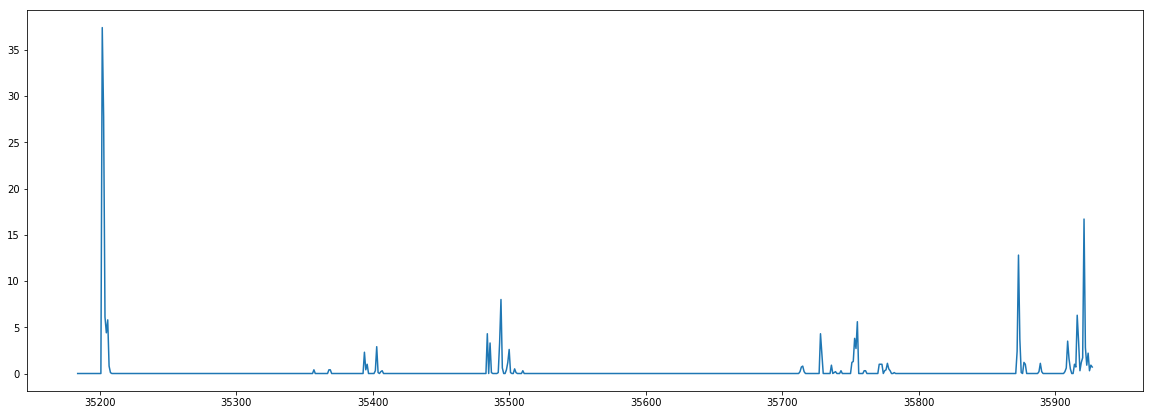

In [112]:
df_zuerich[df_zuerich['month']==8]['rre150h0'].plot(figsize=(20,7))

In [114]:
df_zuerich[df_zuerich['month']==4].groupby("day")["rre150h0"].max()

day
1     0.5
2     0.0
3     0.0
4     0.6
5     0.5
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.9
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    6.3
24    0.0
25    0.0
26    0.9
27    0.0
28    0.0
29    0.0
30    3.8
Name: rre150h0, dtype: float64

In [115]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import calmap


In [116]:
all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

/Users/leasenn/.virtualenvs/erstesVE/lib/python3.7/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)


AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

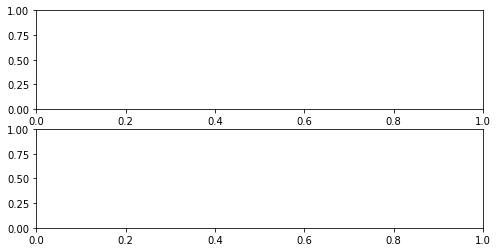

In [118]:
calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(8, 4)))